## 31일차 강의 (2021.8.17)
# 신경망 (keras)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

### 케라스 활용정보
- 케라스 설정파일 : C:/Users/[사용자아이디]/.keras/keras.json
- 데이터셋 폴더 : C:/Users/[사용자아이디]/.keras/datasets
- 홈페이지 : http://keras.io
- input_shape=(30,) 또는 input_dim=30
- activation : softmax, relu, tanh, sigmoid (https://keras.io/activations/)
<br><br>
- Sequencial 가이드 : https://keras.io/getting-started/sequential-model-guide/
- optimizer : sgd, rmsprop, adagrad, adam (https://keras.io/optimizers/)
- loss : mse, mae, categorical_crossentropy, binary_crossentropy (https://keras.io/losses/)
- compile, fit 함수 설명 : https://keras.io/models/sequential/
<br><br>
- keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
- keras.optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)
- keras.optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0)

In [2]:
happy = pd.read_csv('world_happiness_report_2021.csv')
happy.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [3]:
X = happy.iloc[:, 6:12].values
y = happy['Ladder score'].values

In [4]:
X_norm = (X - X.mean(axis=0)) / X.std(axis=0)

X_norm.shape, y.shape

((149, 6), (149,))

In [5]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(256, activation='relu', input_shape=(6,)))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               1792      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 18,305
Trainable params: 18,305
Non-trainable params: 0
_________________________________________________________________


In [6]:
help(model.fit)

Help on method fit in module tensorflow.python.keras.engine.training:

fit(x=None, y=None, batch_size=None, epochs=1, verbose=1, callbacks=None, validation_split=0.0, validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, validation_steps=None, validation_batch_size=None, validation_freq=1, max_queue_size=10, workers=1, use_multiprocessing=False) method of tensorflow.python.keras.engine.sequential.Sequential instance
    Trains the model for a fixed number of epochs (iterations on a dataset).
    
    Arguments:
        x: Input data. It could be:
          - A Numpy array (or array-like), or a list of arrays
            (in case the model has multiple inputs).
          - A TensorFlow tensor, or a list of tensors
            (in case the model has multiple inputs).
          - A dict mapping input names to the corresponding array/tensors,
            if the model has named inputs.
          - A `tf.data` dataset. Should return

In [7]:
model.compile(loss='mse' , optimizer='rmsprop')
model.fit(X_norm, y, batch_size=32, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 6ms/step - loss: 26.6949
Epoch 2/100
5/5 [==============================] - 0s 6ms/step - loss: 13.3095
Epoch 3/100
5/5 [==============================] - 0s 7ms/step - loss: 6.6421
Epoch 4/100
5/5 [==============================] - 0s 7ms/step - loss: 3.6146
Epoch 5/100
5/5 [==============================] - 0s 6ms/step - loss: 2.5137
Epoch 6/100
5/5 [==============================] - 0s 7ms/step - loss: 2.4117
Epoch 7/100
5/5 [==============================] - 0s 8ms/step - loss: 1.5878
Epoch 8/100
5/5 [==============================] - 0s 6ms/step - loss: 1.7989
Epoch 9/100
5/5 [==============================] - 0s 7ms/step - loss: 1.2725
Epoch 10/100
5/5 [==============================] - 0s 7ms/step - loss: 1.3818
Epoch 11/100
5/5 [==============================] - 0s 7ms/step - loss: 1.3008
Epoch 12/100
5/5 [==============================] - 0s 6ms/step - loss: 1.3754
Epoch 13/100
5/5 [==============================] - 0s 7ms/

Text(0, 0.5, 'Error')

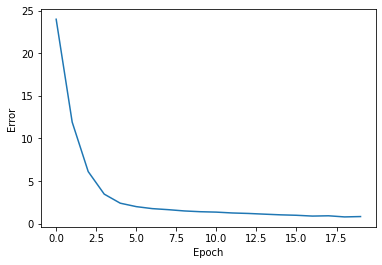

In [12]:
h = model.history.history
plt.plot(h['loss'][:20])
plt.xlabel('Epoch')
plt.ylabel('Error')

In [13]:
pred_y = model.predict(X_norm)
pred_y

array([[8.139123 ],
       [8.184744 ],
       [7.958302 ],
       [7.873102 ],
       [7.963851 ],
       [8.24481  ],
       [7.8879833],
       [7.852629 ],
       [7.9186897],
       [7.7411113],
       [7.8174562],
       [7.178294 ],
       [7.269073 ],
       [7.641897 ],
       [8.000943 ],
       [6.812291 ],
       [7.5459814],
       [6.938292 ],
       [7.2790947],
       [6.9476876],
       [7.1628413],
       [6.6772113],
       [7.298629 ],
       [7.018831 ],
       [7.058247 ],
       [6.69572  ],
       [7.0987234],
       [6.801957 ],
       [7.0535383],
       [5.752174 ],
       [6.671134 ],
       [7.5349   ],
       [5.718225 ],
       [6.3206315],
       [6.126288 ],
       [6.1136103],
       [6.327108 ],
       [6.496093 ],
       [6.482546 ],
       [7.0232615],
       [6.5257463],
       [6.409857 ],
       [6.2962747],
       [6.5105433],
       [6.6174264],
       [6.0928454],
       [6.466243 ],
       [6.0050015],
       [5.8706107],
       [6.260833 ],


In [16]:
display(pred_y[-10:], y[-10:])

array([[4.264574 ],
       [3.8895993],
       [3.9997513],
       [3.8110757],
       [4.0196447],
       [3.6890738],
       [4.4735675],
       [3.6587276],
       [4.143788 ],
       [2.94009  ]], dtype=float32)

array([3.775, 3.658, 3.623, 3.615, 3.6  , 3.512, 3.467, 3.415, 3.145,
       2.523])

In [19]:
happy[happy['Country name'].str.find('Korea')>=0]

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
61,South Korea,East Asia,5.845,0.042,5.928,5.763,10.651,0.799,73.9,0.672,-0.083,0.727,2.43,1.403,0.758,0.801,0.353,0.134,0.135,2.262


In [25]:
X_norm[[61]]

array([[ 1.0554989 , -0.13750721,  1.32167785, -1.058844  , -0.45198562,
        -0.00251738]])

In [22]:
model.predict(X_norm[61].reshape(1,6)) # 인풋 샘플이 1개더라도 반드시 2차원 형태로 입력해야 함!

array([[6.160077]], dtype=float32)

In [22]:
model.predict(X_norm[[61]])

array([[6.160077]], dtype=float32)

(-0.5, 10.5, -0.5, 10.5)

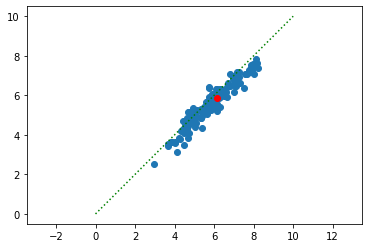

In [31]:
plt.scatter(pred_y, y)
plt.scatter(pred_y[61], y[61], c='r')
plt.plot([0,10], [0,10], 'g:')
plt.axis('equal')